### 1. Write a program that uses an if-else ladder

In [1]:
num = int(input("Enter a number"))
if num > 0:
    print(num, "is a positive number.")
elif num==0:
    print(num,"zero")
else:
    print(num, "is a negative number")

Enter a number4
4 is a positive number.


### 2. Write five different functions and call them in one program

In [2]:
class b_a:
    def __init__(self):
        self.balance=0
        print("Bank Account details")
    def deposit(self):
        amt=float(input("enter amt to be deposited"))
        self.balance+=amt
        print("Amount deposited",amt)
        
    def withdraw(self):
        amt=float(input("enter amt to be deposited"))
        if self.balance>=amt:
            self.balance-=amt
            print("Amt withdrawn",amt)
        else:
            print("Sorry, no balance")
            
    def balance1(self):
        print("Net balance",self.balance)
        
ob=b_a()
j=int(input("Enter no of transactions"))
for i in range(j):
    
    n=str(input("What do you wanna do?  Deposit(d), Withdraw(w), type accordingly"))
    if n=='d':
        ob.deposit()
    elif n=='w':
        ob.withdraw()
    else:
        print("Wrong input")
    ob.balance1()

Bank Account details
Enter no of transactions3
What do you wanna do?  Deposit(d), Withdraw(w), type accordingly568,69,89
Wrong input
Net balance 0
What do you wanna do?  Deposit(d), Withdraw(w), type accordingly86,03,689
Wrong input
Net balance 0
What do you wanna do?  Deposit(d), Withdraw(w), type accordingly34.86,568
Wrong input
Net balance 0


### 3. Read any dataset from https://archive.ics.uci.edu/ml/index.php and perform a missing value 

In [13]:
import pandas as pd
import numpy as np
df=pd.read_csv('adult.data')
df.columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [16]:
df.shape

(32560, 15)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int64
workclass         32560 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education-num     32560 non-null int64
marital-status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital-gain      32560 non-null int64
capital-loss      32560 non-null int64
hours-per-week    32560 non-null int64
native-country    32560 non-null object
income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Missing values

In [ ]:
df.isnull().sum()

In [19]:
df.isin(["?"]).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [20]:
num= [i for i in df.columns if df[i].dtype!='O']
num

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [21]:
for i in num:
    print(f" {i}  :  {len(df[i].unique())}")

 age  :  73
 fnlwgt  :  21647
 education-num  :  16
 capital-gain  :  119
 capital-loss  :  92
 hours-per-week  :  94


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
for feature in num:
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Probability density")
    plt.title(feature)
    plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [ ]:
df["age"] = np.log(df["age"])
df["fnlwgt"] = np.log(df["fnlwgt"])

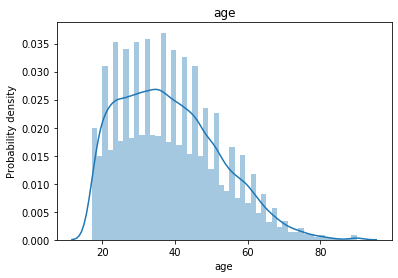

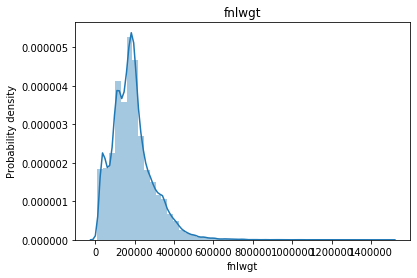

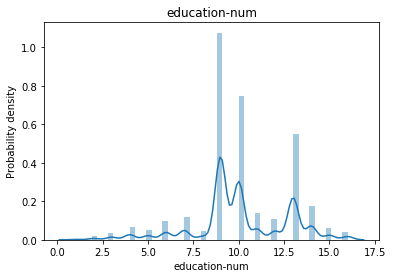

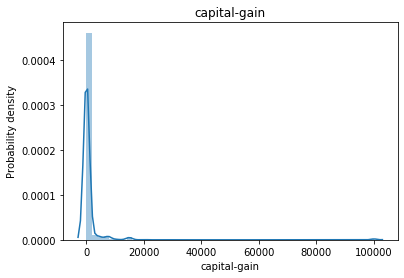

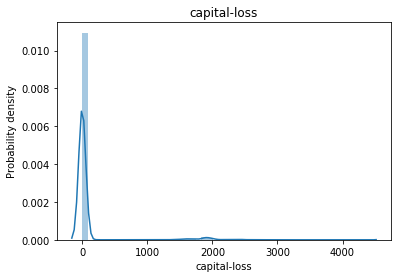

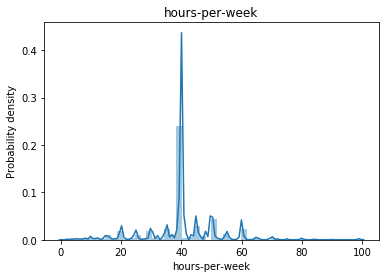

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
for feature in num:
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Probability density")
    plt.title(feature)
    plt.show()

#### categorical

In [25]:
categorical = [i for i in df.columns if df[i].dtypes == "O"]

In [26]:
for feature in categorical:
    print(f" {feature}  :  {len(df[feature].unique())}")

 workclass  :  9
 education  :  16
 marital-status  :  7
 occupation  :  15
 relationship  :  6
 race  :  5
 sex  :  2
 native-country  :  42
 income  :  2


In [27]:
df["occupation"].mode()[0]

' Prof-specialty'

In [28]:
df["workclass"].mode()[0] 

' Private'

In [29]:
df['native-country'].mode()[0] 

' United-States'

In [30]:
df["workclass"] = df['workclass'].str.replace('?', 'Private' )
df['occupation'] = df['occupation'].str.replace('?', 'Prof-specialty' )
df['native-country'] = df['native-country'].str.replace('?', 'United-States' )

In [31]:
df.loc[32414]

age                                57
workclass            Self-emp-not-inc
fnlwgt                          65080
education                     HS-grad
education-num                       9
marital-status     Married-civ-spouse
occupation               Craft-repair
relationship                  Husband
race                            White
sex                              Male
capital-gain                        0
capital-loss                        0
hours-per-week                     50
native-country          United-States
income                           >50K
Name: 32414, dtype: object

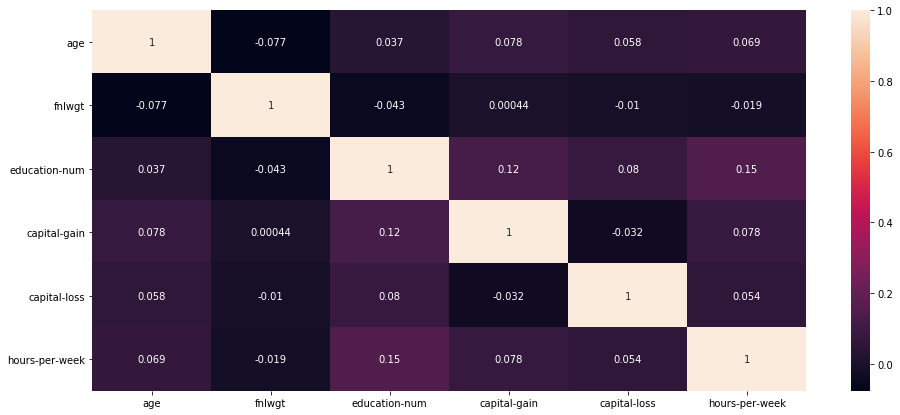

In [32]:
plt.figure(figsize = (16 , 7))
sns.heatmap(df.corr(), annot=True);

In [41]:
# The correlation between capital gain and capital loss is negative
# The correlation btw fnlwgt and hours-per week is negative

### 4. Read a dataset and perform slice it in different ways 

In [42]:
df2=df=pd.read_csv('tips.csv')
df.loc[2]

table_number        16
total_bill       21.01
tip                3.5
sex               Male
smoker              No
day                Sun
time            Dinner
size                 3
Name: 2, dtype: object

In [43]:
df.iloc[:5]

,table_number,total_bill,tip,sex,smoker,day,time,size
0,3,16.99,1.01,Female,No,Sun,Dinner,2
1,6,10.34,1.66,Male,No,Sun,Dinner,3
2,16,21.01,3.50,Male,No,Sun,Dinner,3
3,12,23.68,3.31,Male,No,Sun,Dinner,2
4,2,24.59,3.61,Female,No,Sun,Dinner,4


In [44]:
df.iloc[::5]

,table_number,total_bill,tip,sex,smoker,day,time,size
0,3,16.99,1.01,Female,No,Sun,Dinner,2
5,3,25.29,4.71,Male,No,Sun,Dinner,4
10,16,10.27,1.71,Male,No,Sun,Dinner,2
15,4,21.58,3.92,Male,No,Sun,Dinner,2
20,2,17.92,4.08,Male,No,Sat,Dinner,2
25,16,17.81,2.34,Male,No,Sat,Dinner,4
30,3,9.55,1.45,Male,No,Sat,Dinner,2
35,7,24.06,3.60,Male,No,Sat,Dinner,3
40,4,16.04,2.24,Male,No,Sat,Dinner,3
45,7,18.29,3.00,Male,No,Sun,Dinner,2


In [45]:
df.iloc[2:5]

,table_number,total_bill,tip,sex,smoker,day,time,size
2,16,21.01,3.50,Male,No,Sun,Dinner,3
3,12,23.68,3.31,Male,No,Sun,Dinner,2
4,2,24.59,3.61,Female,No,Sun,Dinner,4


In [46]:
df.iloc[[1, 3, 5], [1, 3]]

,total_bill,sex
1,10.34,Male
3,23.68,Male
5,25.29,Male


In [47]:
df.loc[[1, 2, 3]]

,table_number,total_bill,tip,sex,smoker,day,time,size
1,6,10.34,1.66,Male,No,Sun,Dinner,3
2,16,21.01,3.50,Male,No,Sun,Dinner,3
3,12,23.68,3.31,Male,No,Sun,Dinner,2


### Can we find correlation between two categorical variables? How?

In [48]:
#Yes, we can calculate correlation of two categorical variables by converting one categorical variable into numeric. 
#1. Tetrachoric Correlation: Used to calculate the correlation between binary categorical variables.
#2. Polychoric Correlation: Used to calculate the correlation between ordinal categorical variables.
#3. Cramer’s V: Used to calculate the correlation between nominal categorical variables.